![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

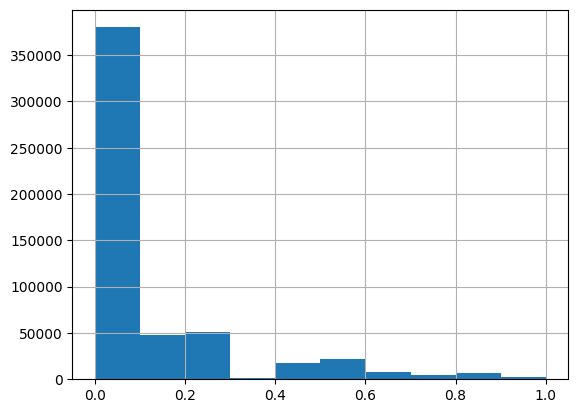

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 1
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#Inicialmente lo tokenizamos pasando todo a minúsculas

vect = CountVectorizer(lowercase=True)
X_train_dtm_A = vect.fit_transform(X_train)
X_test_dtm_A = vect.transform(X_test)
clf = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
clf.fit(X_train_dtm_A, y_train)
y_pred = clf.predict(X_test_dtm_A)

mse_rf1 = mean_squared_error(y_test, y_pred)

print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf1))

X_train_dtm_A.shape

El modelo de XGBoost muestra un MSE de 0.0286451985271934 en el set de Test


(362779, 141176)

In [11]:
#posteriormente lo tokenizamos con sensibilidad a mayusculas

vect_min = CountVectorizer(lowercase=False)
X_train_dtm_B = vect_min.fit_transform(X_train)
X_test_dtm_B = vect_min.transform(X_test)
clf = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
clf.fit(X_train_dtm_B, y_train)
y_pred = clf.predict(X_test_dtm_B)

mse_rf2 = mean_squared_error(y_test, y_pred)

print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf2))

X_train_dtm_B.shape

El modelo de XGBoost muestra un MSE de 0.02955974935987425 en el set de Test


(362779, 184417)

Se observa que convertir todo a minúsculas para estos datos tiene un mejor poder predictivo, lo cual podría deberse a que para este caso tener palabras con mayúsculas no agrega información, y al no eliminarlos en el modelo sensible a mayúsculas, se están agregando más de 43mil tokens con información repetida que empeoran el poder predictivo del modelo sensible vs el que convierte todo en minúsculas

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
vect2 = CountVectorizer(lowercase=True, ngram_range=(1, 3))
X_train_dtm_C = vect2.fit_transform(X_train)
X_test_dtm_C = vect2.transform(X_test)
clf = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
clf.fit(X_train_dtm_C, y_train)
y_pred = clf.predict(X_test_dtm_C)
mse_rf3 = mean_squared_error(y_test, y_pred)
print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf3))

X_train_dtm_C.shape

El modelo de XGBoost muestra un MSE de 0.02860769691222019 en el set de Test


(362779, 14221994)

In [13]:
vect2_min = CountVectorizer(lowercase=False, ngram_range=(1, 3))
X_train_dtm_D = vect2_min.fit_transform(X_train)
X_test_dtm_D = vect2_min.transform(X_test)
clf = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
clf.fit(X_train_dtm_D, y_train)
y_pred = clf.predict(X_test_dtm_D)
mse_rf4 = mean_squared_error(y_test, y_pred)
print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf4))

X_train_dtm_D.shape

El modelo de XGBoost muestra un MSE de 0.029538305060640098 en el set de Test


(362779, 15302855)

Se observa una leve mejora en desempeño al usar unigramas, bigramas y trigramas, lo que pareciera indicar que para esta muestra, el orden en que se encuentran las palabras puede agregar información referente a si es o no tóxico el texto.

También se observa que como en el anterior caso, agregar sensibilidad a mayúsculas empeora el poder predictivo del modelo

In [33]:
# solo Trigrmas
vect3 = CountVectorizer(lowercase=True, ngram_range=(3, 3))
X_train_dtm_C3 = vect3.fit_transform(X_train)
X_test_dtm_C3 = vect3.transform(X_test)
clf = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
clf.fit(X_train_dtm_C3, y_train)
y_pred = clf.predict(X_test_dtm_C3)
mse_rf31 = mean_squared_error(y_test, y_pred)
print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf31))

X_train_dtm_C3.shape

El modelo de XGBoost muestra un MSE de 0.03834023054188761 en el set de Test


(362779, 10546378)

Se decidió intentar utilizando solo Trigramas, pero se observó que en este caso el poder predictivo empeora.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

# Celda 3

En textos (corpus) largos se encuentran palabras comunes como 'the', 'a', 'is' de forma muy frecuente. Se presume que estas palabras no contienen mucho contexto sobre la oración, sin embargo, son frecuentes y debido a esto puede opacar el impacto de palabras menos frecuentes que ofrecen más contexto, por ejemplo 'philosophy', 'cooking', 'accident'. 

La función TfidfVectorizer tiene como objetivo reducir el impacto de las palabras frecuentes con poco contexto para que aquellas que ofrecen más contexto sean representadas en los modelos. Para conseguir esto, la función **multiplica** la **frecuencia por término** (obtenida de CountVectorizer) por **la frecuencia por documento inversa**.

La frecuencia por documento inversa se obtiene con la siguiente ecuación:

$$idf\left(t\right) = log\left( \frac{1+n}{1+df\left (t\right )} \right ) + 1$$

En donde n es el número total de textos en el corpus y df(t) es el número de documentos que contienen la palabra t. 

Finalmente, la función TfidfVectorizer nos devuelve una matriz normalizada de la forma

$$ TfidfVectorizer\left ( t,d \right ) = CountVectorizer\left ( t,d \right ) * idf\left ( t \right ) $$

Nota: '*' Es un producto cruz.

Si se compara la función de TfidfVectorizer con CountVectorizer una de las principales ventajas de la primera es que CountVectorizer cuenta la frecuencia de las palabras y esto puede generar un sesgo a favor de las palabras con mayor frecuencia e ignora las palabras "raras" que permitirían procesar los datos de mejor manera; mientras que TfidfVectorizer considera el peso total de la palabra en los documentos y penaliza las palabras más frecuentes.

Como desventajas vs CountVectorizer, se tiene un mayor costo computacional, ya que implementa esta misma función con una serie de trasformaciones/ponderaciones. Adicionalmente, es importante tener en cuenta el contexto de los datos a procesar, puesto que la penalización de las palabras "comunes" no necesariamente es deseada. 


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 4
vec3 = TfidfVectorizer(lowercase=True, stop_words='english')
Xp3 = vec3.fit_transform(X_train)

# Implementación de modelo
modelo_XGB3 = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
modelo_XGB3.fit(Xp3, y_train)
predict_RF3 = modelo_XGB3.predict(vec3.transform(X_test))

mse_rf5= metrics.mean_squared_error(y_test, predict_RF3)
print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf5))

Xp3.shape

El modelo de XGBoost muestra un MSE de 0.028523700403294293 en el set de Test


(362779, 140862)

In [19]:
# Celda 4
vec3_min = TfidfVectorizer(lowercase=False, stop_words='english')
Xp3_min = vec3_min.fit_transform(X_train)

# Implementación de modelo
modelo_XGB3 = XGBRegressor(n_jobs=-1,random_state=1, n_estimators=10)
modelo_XGB3.fit(Xp3_min, y_train)
predict_RF3 = modelo_XGB3.predict(vec3_min.transform(X_test))

mse_rf6= metrics.mean_squared_error(y_test, predict_RF3)
print("El modelo de XGBoost muestra un MSE de {} en el set de Test".format(mse_rf6))

Xp3_min.shape

El modelo de XGBoost muestra un MSE de 0.029465975398559024 en el set de Test


(362779, 184103)

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

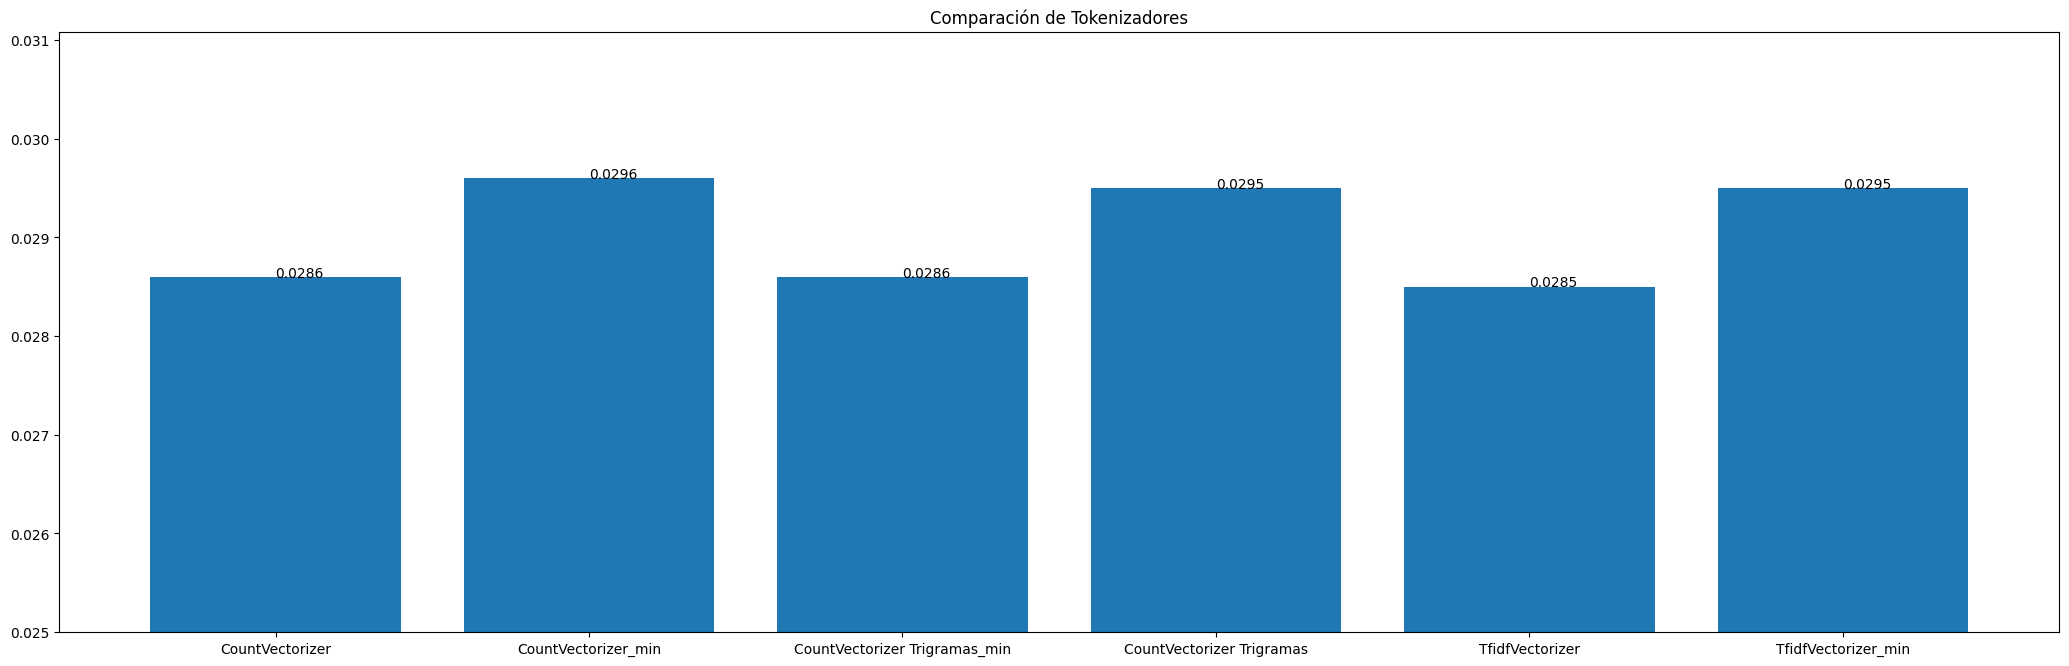

In [26]:
# Celda 5
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Tokenizadores")
ejeX = ['CountVectorizer','CountVectorizer_min','CountVectorizer Trigramas_min' ,
        'CountVectorizer Trigramas' ,'TfidfVectorizer','TfidfVectorizer_min']
ejeY = [round(mse_rf1,4),round(mse_rf1m,4),round(mse_rf3,4),round(mse_rf4,4),round(mse_rf5,4),round(mse_rf6,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.ylim(0.025)
plt.show()

Se observa que en general para estos datos los modelos convertidos a minúsculas presentan un mejor desempeño que su contraparte sensible a mayúsculas y minúsculas, pero es importante tener en cuenta que esto no es una regla, sino que depende del tipo de contexto que se esté evaluado, ya que por ejemplo las mayúsculas se emplean mucho para expresar "emociones" por lo que en un caso donde esto sea relevante podría ser mejor el modelo con sensibilidad a mayúsculas y minúsculas.

El mejor modelo fue TfidfVectorizer según la métrica MSE.

En este tipo de preprocesamientos es importante tener en el radar el trade-off de mejora predictiva vs costo computacional, ya que por ejemplo en esta base de datos, el hecho de usar unigramas, bigrmas y programas genero un incremento superior a 10 veces los tokes de solo usar unigrmas.